<a href="https://colab.research.google.com/github/crislanecas/python/blob/main/Alura%26WoMakersCode/17_Data_Visualization_explorando_com_Seaborn_Dataset_atualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas

In [86]:
# Importa as bibliotecas.
import pandas as pd
import seaborn as sns

In [87]:
# Importa parte da biblioteca Scipy.
from scipy.stats import ranksums

# Importação dos dados

In [88]:
# Importa parte da biblioteca do Google Colab para te acesso ao Google Drive, utilizando o método drive.mount().
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# Cria um dataframe para receber os dados do arquivo CSV.
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Analytics - WoMakersCode/Estatística - Alura/tips_atualizado.csv')

In [90]:
# Mostra um resumo do dataframe, com os 5 primeiros e últimos registros e total de linhas e colunas.# Mostra um resumo do dataframe, com os 5 primeiros e últimos registros e total de linhas e colunas.
dados

,total_bill,tip,dessert,day,time,size
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


# Tradução das colunas e campos


In [91]:
# Mostra o index() com os nomes das colunas do dataframe.
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [92]:
# Cria um dicionário com os nomes das colunas, informando de forma correspondente os novos nomes para cada coluna.
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [93]:
# Renomeia as colunas conforme dicionário criado acima e atribui a uma nova variável o dataframe.
# O parâmetro inplace modifica o dataframe original, não sendo necessárioem vez de retornar um novo.
dados.rename(columns = renomear, inplace = True)

In [94]:
# Mostra a primeira linha do dataframe, conforme parâmetro informado entre parenteses.
dados.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [95]:
# Renomeia as colunas conforme dicionário criado acima e atribui a uma nova variável o dataframe.
gorjetas = dados.rename(columns = renomear)

In [96]:
# Mostra a primeira linha do dataframe, conforme parâmetro informado.
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [97]:
# Mostra todos os valores únicos da coluna/variável sobremesa.
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [98]:
# Cria um dicionário com os campos, informando de forma correspondente os novos nomes para cada campo.
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [99]:
# Mapea todos campos da coluna/variável sobremesa, tendo como parâmetro a dicionário sim_nao.
gorjetas.sobremesa.map(sim_nao)

0       Não
1       Não
2       Não
3       Não
4       Não
       ... 
3411    Não
3412    Sim
3413    Sim
3414    Não
3415    Não
Name: sobremesa, Length: 3416, dtype: object

In [100]:
# Atribui o mapa para a coluna/variável sobremesa.
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [101]:
# Mostra a primeira linha do dataframe, conforme parâmetro informado.
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [102]:
# Mostra todos os valores únicos da coluna/variável dias da semana.
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [103]:
# Cria um dicionário com os campos, informando de forma correspondente os novos nomes para cada campo do dia da semana.
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [104]:
# Mapea todos campos da coluna/variável dia da semana, tendo como parâmetro o dicionário dias.
# Atribui o mapa para a coluna/variável dias da semana.
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [105]:
# Mostra a primeira linha do dataframe, conforme parâmetro informado.
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [106]:
# Mostra novamente todos os valores únicos da coluna/variável dias da semana, agora com as novas atribuições dos campos.
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [107]:
# Mostra todos os valores únicos da coluna/variável hora do dia.
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [108]:
# Cria um dicionário com os campos, informando de forma correspondente os novos nomes para cada campo da hora do dia.
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [109]:
# Mapea todos campos da coluna/variável hora do dia, tendo como parâmetro o dicionário hora.
# Atribui o mapa para a coluna/variável hora do dia.
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [110]:
# Mostra a primeira linha do dataframe, conforme parâmetro informado.
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Análise 1: valor da conta e gorjeta


## Análise gráfica

<Axes: xlabel='valor_da_conta', ylabel='gorjeta'>

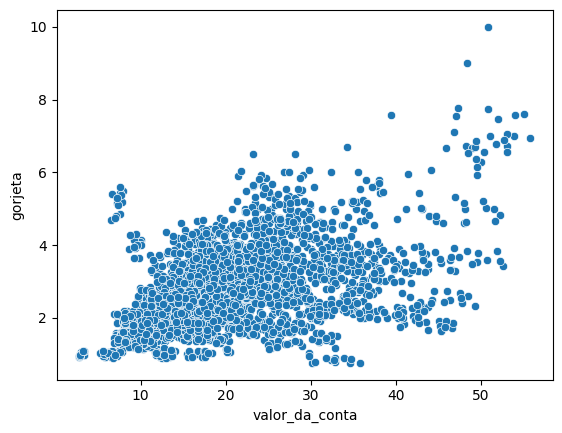

In [111]:
# Cria um gráfico de dispersão.
sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data=gorjetas)

Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta.

In [112]:
# Mostra a quantidade de linhas e colunas do dataframe.
gorjetas.shape

(3416, 6)

In [113]:
# Formata uma frase para exibir o número de linhas/registros.
print('A base de dados contém {} registros'.format(gorjetas.shape[0]))

A base de dados contém 3416 registros


In [114]:
# Formata uma frase para exibir o número de linhas/registros.
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
# Exibe um frase para mostrar do que se trata os dados abaixo.
print('Registros não nulos')
# Conta os registros de todas as colunas do dataframe para verificar que não há dados nulos.
gorjetas.count()

A base de dados contém 3416 registros 

Registros não nulos


valor_da_conta      3416
gorjeta             3416
sobremesa           3416
dia_da_semana       3416
hora_do_dia         3416
total_de_pessoas    3416
dtype: int64

In [115]:
# Adiciona uma nova coluna ao dataframe com o calculo do percentual de gorgetas.
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [116]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587


In [117]:
# Arredonda os valores de percentual para duas casas.
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.porcentagem

0       0.06
1       0.16
2       0.17
3       0.14
4       0.15
        ... 
3411    0.18
3412    0.06
3413    0.08
3414    0.09
3415    0.16
Name: porcentagem, Length: 3416, dtype: float64

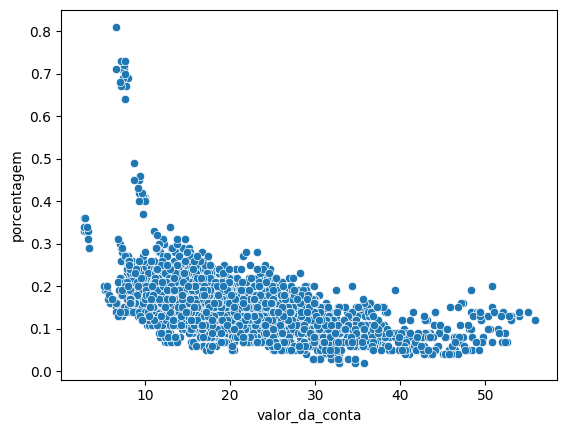

In [118]:
# Cria uma gráfico de dispersão.
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

## Conclusão

...

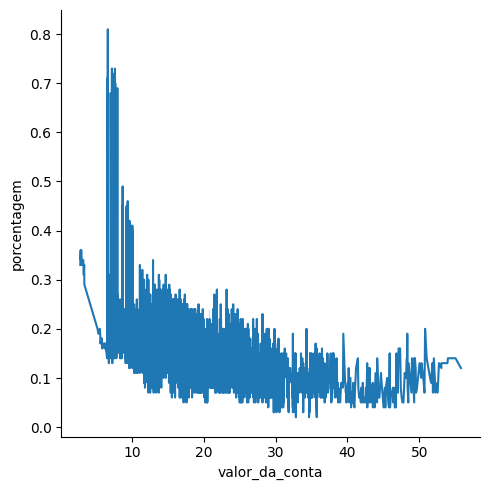

In [119]:
# Cria um gráfico de linha.
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

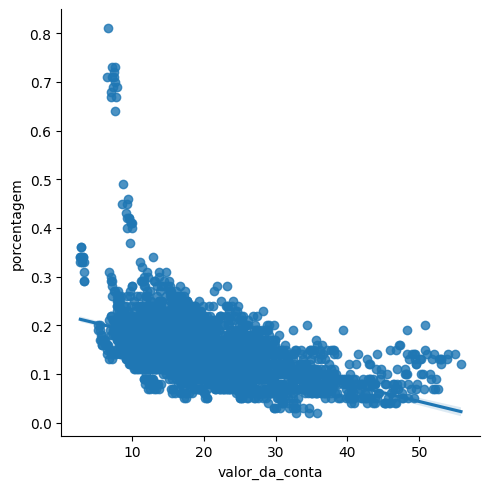

In [120]:
# Cria uma gráfico de dispersão com uma linha de tendência.
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

[Text(0.5, 0, 'Valor da conta'), Text(0, 0.5, 'Valor da gorjeta')]

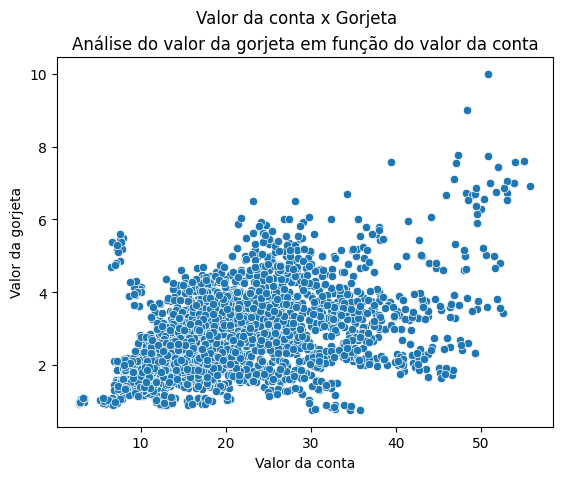

In [121]:
# Cria uma gráfico de dispersão pernsonalizado.
grafico = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)
grafico.figure.suptitle('Valor da conta x Gorjeta') # Insere um título no gráfico.
grafico.set_title('Análise do valor da gorjeta em função do valor da conta') # Insere um subtítulo.
grafico.set(xlabel='Valor da conta', ylabel='Valor da gorjeta') # Personaliza as labels para eixos x e y, respectivamente.

In [122]:
# Cria uma imagem com o gráfico no formato png.
imagem = grafico.get_figure()

In [123]:
# Salva a imagem usando savefig().
imagem.savefig('imagem.png')

# Análise 2: sobremesa

## Análise grafica

In [124]:
# Mostra apenas os registros em que sobremesa é igual a 'Sim', portanto que pediram sobremesa.
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.010000,3.000000,Sim,Sábado,Jantar,4,0.08
58,11.240000,1.760000,Sim,Sábado,Jantar,2,0.16
60,20.290000,3.210000,Sim,Sábado,Jantar,2,0.16
61,13.810000,2.000000,Sim,Sábado,Jantar,2,0.14
62,11.020000,1.980000,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
3406,16.882586,2.967175,Sim,Sábado,Jantar,2,0.18
3408,11.840990,1.044625,Sim,Sábado,Jantar,2,0.09
3409,34.704251,0.882144,Sim,Sábado,Jantar,2,0.03
3412,25.531567,1.604021,Sim,Sábado,Jantar,2,0.06


In [125]:
# Mostra uma tabela descritiva com os dados estatísticos dos registros onde a variável sobremesa é igual a 'Sim'.
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [126]:
# Mostra uma tabela descritiva com os dados estatísticos dos registros onde a variável sobremesa é igual a 'Não'.
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


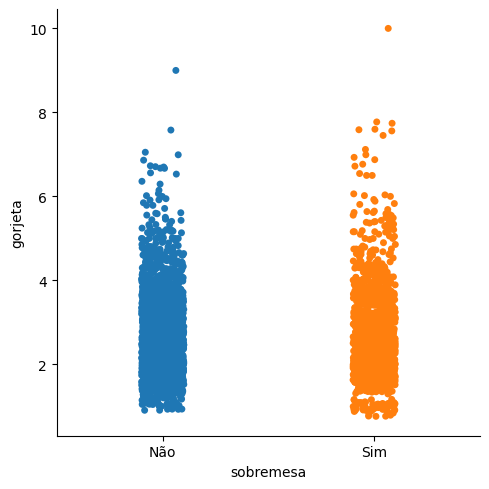

In [127]:
# Cria uma gráfico categórico, com as variáveis sobremesa e gorjeta.
sns.catplot(x='sobremesa', y='gorjeta', hue='sobremesa', data=gorjetas)

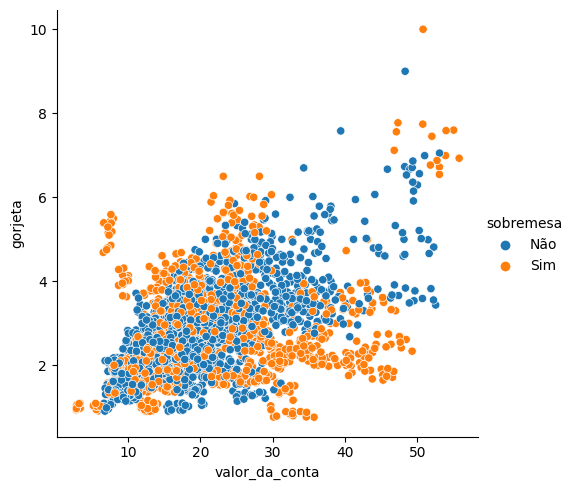

In [128]:
# Cria uma gráfico de dispersão, relacionando valor da conta com a gorjeta, mas diferencia a tonalidade por sobremesa, sim ou não.
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

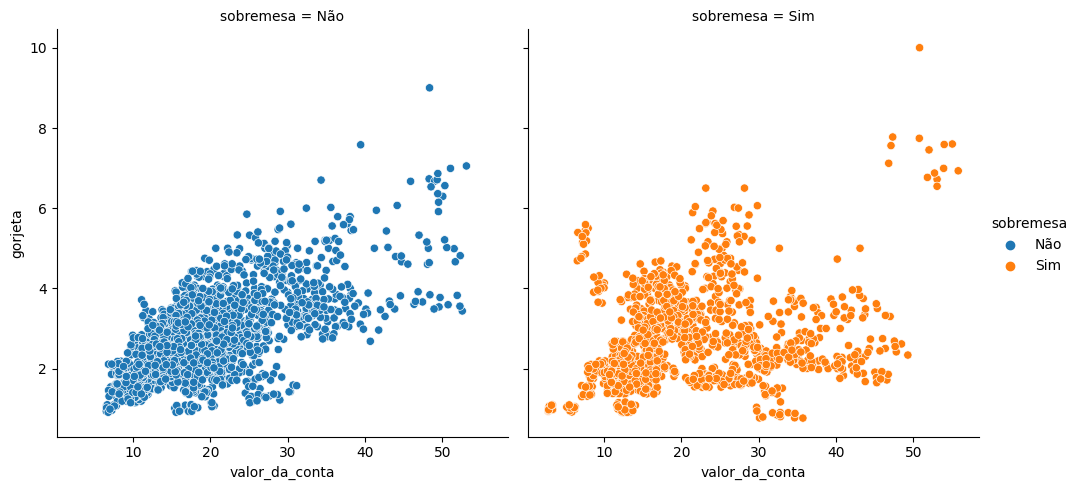

In [129]:
# Cria um gráfico de dispersão, relacionando valor da conta com a gorjeta, mas separado em dois gráficos pela variáveis sobremesa.
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

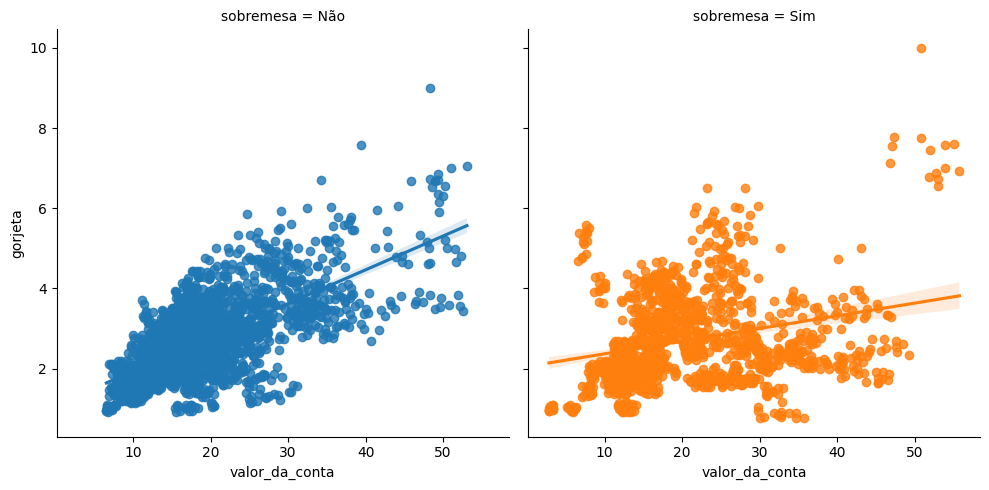

In [130]:
# Cria uma gráfico de dispersão, relacionando valor da conta com a gorjeta, com uma reta de regressão.
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

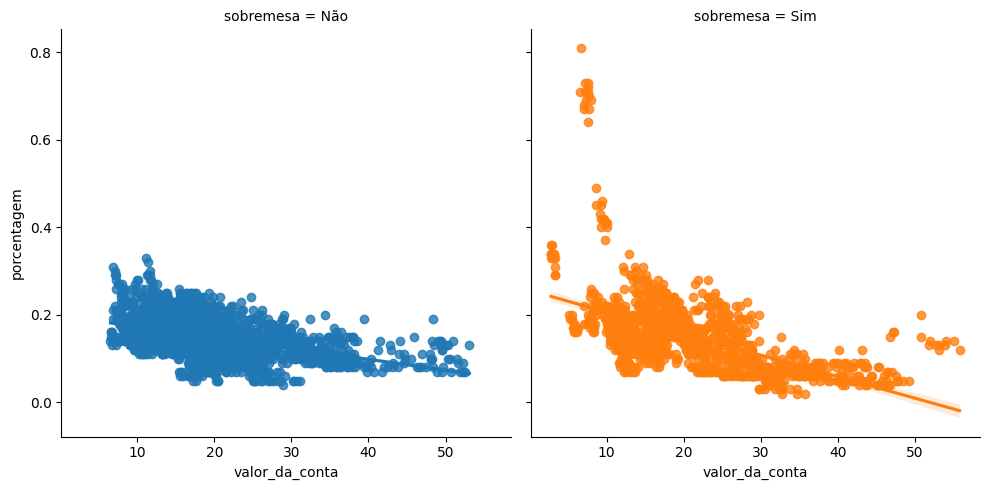

In [131]:
# Cria uma gráfico de dispersão, relacionando valor da conta com o percentual, com uma linha de tendência.
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

## Conclusão

...

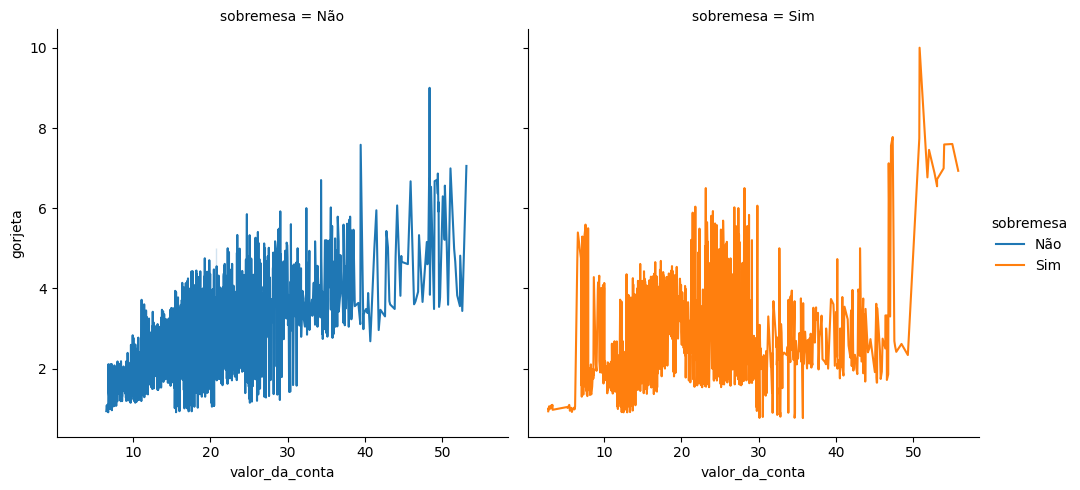

In [132]:
# Cria um gráfico de linha, relacionando valor da conta com a gorjeta, separado. mas separado em dois gráficos pela variáveis sobremesa.
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

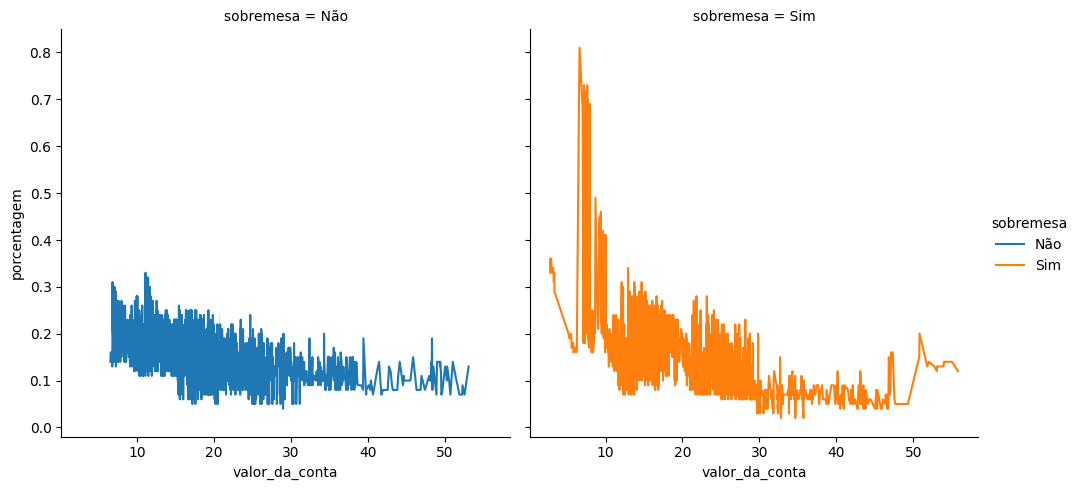

In [133]:
# Cria um gráfico de linha, relacionando valor da conta com o perncentual, mas separado em dois gráficos pela variáveis sobremesa.
sns.relplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

## Teste de hipótese

**H<sup>null</sup>** ou **H<sup>0</sup>**=
A distribuição da gorjeta é igual nos dois grupos.

**H<sup>alt</sup>** ou **H<sup>1</sup>**=
A distribuição da gorjeta é não é igual nos dois grupos.

In [134]:
# Faz um retorne no dataset com apenas os registros que pediram sobremesa.
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sobremesa

56      0.08
58      0.16
60      0.16
61      0.14
62      0.18
        ... 
3406    0.18
3408    0.09
3409    0.03
3412    0.06
3413    0.08
Name: porcentagem, Length: 1302, dtype: float64

In [135]:
# Faz um retorne no dataset com apenas os registros que não pediram sobremesa.
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem
sem_sobremesa

0       0.06
1       0.16
2       0.17
3       0.14
4       0.15
        ... 
3407    0.12
3410    0.09
3411    0.18
3414    0.09
3415    0.16
Name: porcentagem, Length: 2114, dtype: float64

In [136]:
# Calcula a estatística de teste e p-valor, para verificar se os dois grupos são iguais ou diferentes.
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-2.130334422180308, pvalue=0.033144013617673405)

In [137]:
# Formata uma frase para selecionar e exibir o apenas o p-valor.
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.033144013617673405


## Conclusão

....

# Análise 3: dia da semana

## Análise gráfica

In [138]:
# Mostra todos os valores únicos da coluna/variável dias da semana.
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

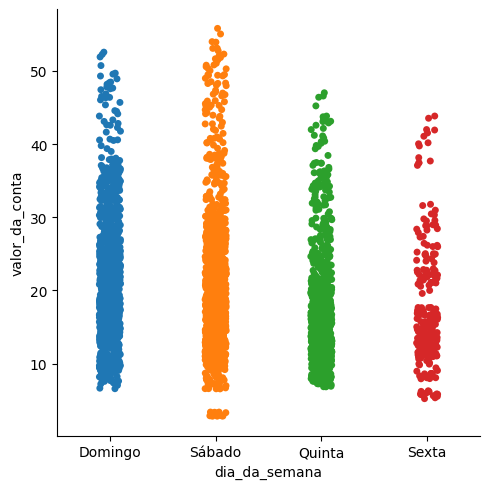

In [139]:
# Criar um de gráficos de categórias, relacionando o valor da conta com os dias da semana.
sns.catplot(x='dia_da_semana', y='valor_da_conta', hue='dia_da_semana', data=gorjetas)

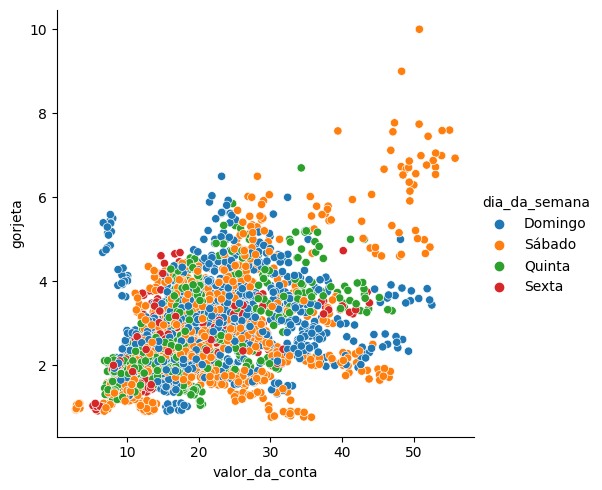

In [140]:
# Cria uma gráfico de dispersão, relacionando valor da conta com a gorjeta e diferenciando a tonalidade por pelos dias da semana.
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

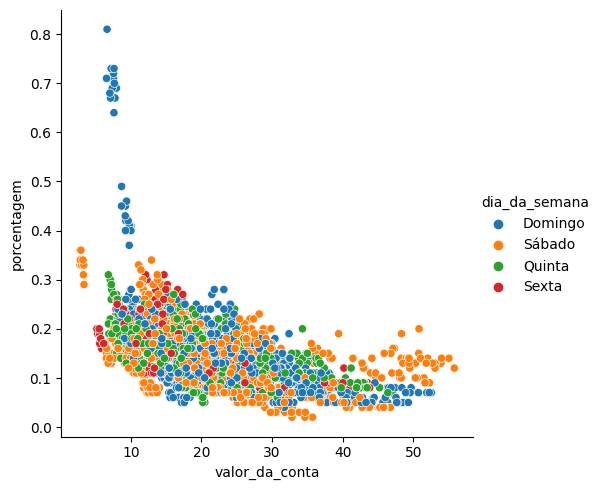

In [141]:
# Cria uma gráfico de dispersão, relacionando valor da conta com a percentual da gorjeta e diferenciando a tonalidade por pelos dias da semana.
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

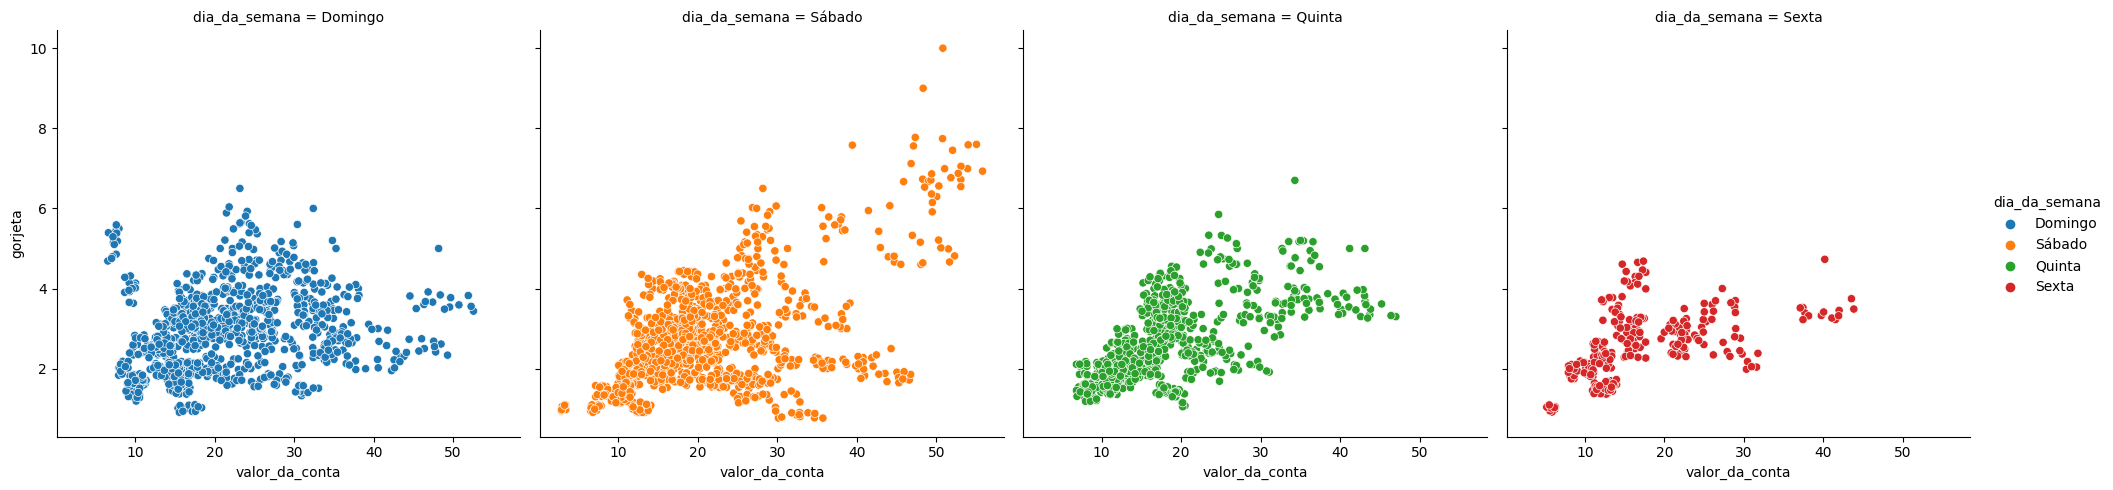

In [142]:
# Cria uma gráfico de dispersão, relacionando o valor da conta com a gorjeta, diferenciando a cor e coluna pelo dia da semana.
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

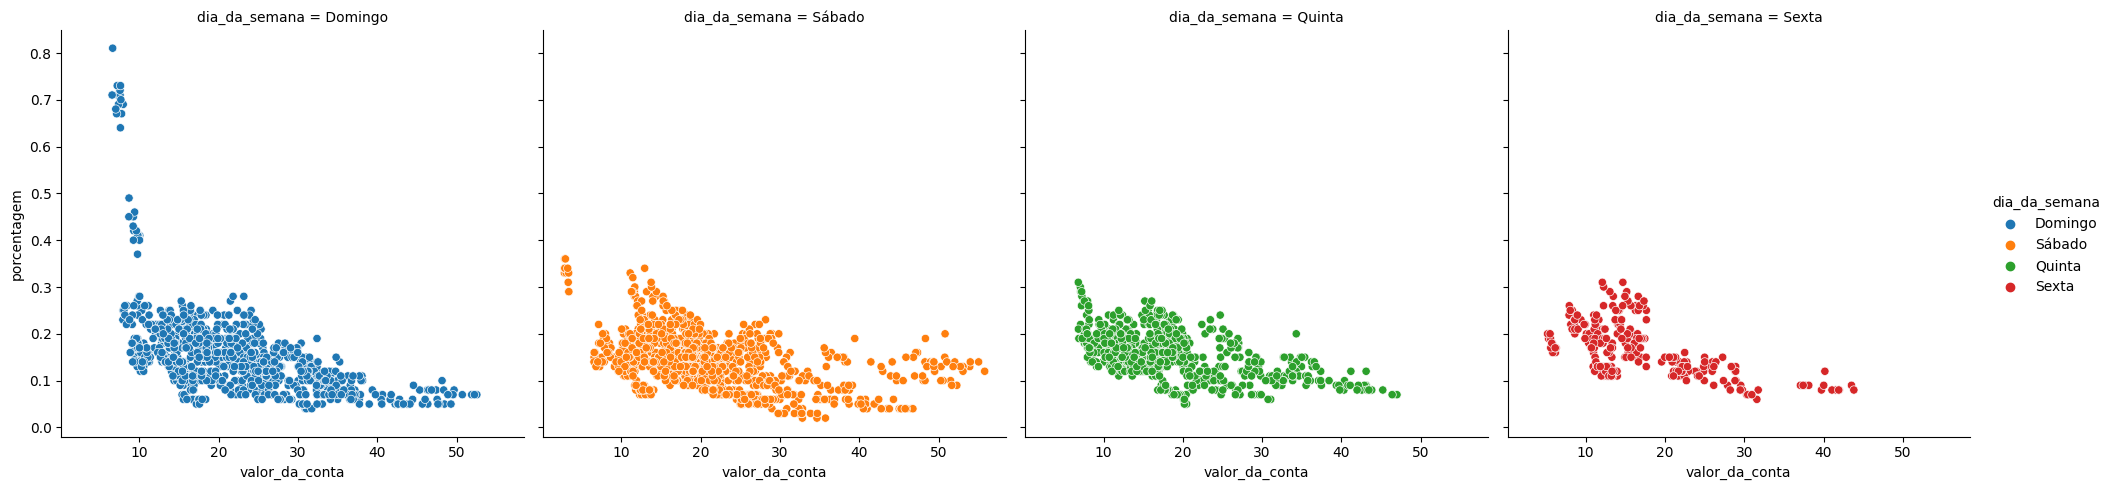

In [143]:
# Cria uma gráfico de dispersão, relacionando o valor da conta com o percentual de gorjeta, diferenciando a cor e coluna pelo dia da semana.
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

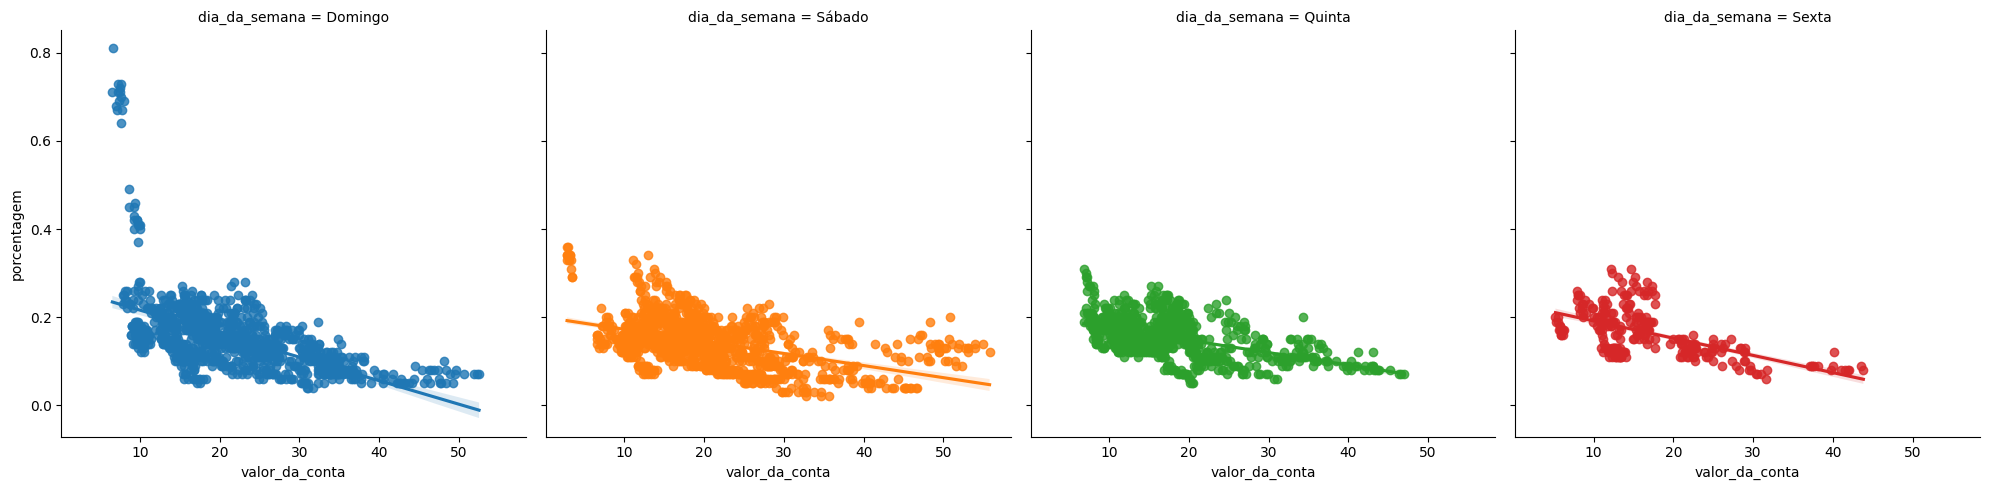

In [144]:
# Cria uma gráfico de dispersão, relacionando o valor da conta com o percentual de gorjeta, diferenciando a cor e coluna pelo dia da semana e incluindo uma linha de tendência.
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

## Conclusão

...

## Análise descritiva

In [145]:
# Calcula a média geral dos valores das gorgetas.
media_geral_gorjetas = gorjetas.gorjeta.mean()
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.711189214091612


In [146]:
# Calcula a média das variáveis/colunas, por dia da semana.
gorjetas.groupby(['dia_da_semana']).mean()

<ipython-input-146-926e570874ce>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_da_semana']).mean()


,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.439133,2.902079,2.842105,0.154953
Quinta,17.724088,2.556177,2.451613,0.154090
Sexta,17.215616,2.549960,2.105263,0.163158
Sábado,20.480249,2.690114,2.517241,0.143604


In [147]:
# Calcula a média das variáveis/colunas, por dia da semana, mas especificando as colunas a ser consideradas.
# Exclui a média de pessoas, pois como não existem 2,84 pessoas, não faz sentido exibir esse tipo de dado.
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

<ipython-input-147-8e33b569c55f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439133,2.902079,0.154953
Quinta,17.724088,2.556177,0.154090
Sexta,17.215616,2.549960,0.163158
Sábado,20.480249,2.690114,0.143604


In [148]:
print('Frequência dos dias') # Exibe um frase para mostrar do que se trata os dados abaixo.
# Calcula com que frequência cada dia da semana apareceu na coluna dias da semana.
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>** ou **H<sup>0</sup>**=
A distribuição do valor da conta é igual no sábado e no domingo.

**H<sup>alt</sup>** ou **H<sup>1</sup>**=
A distribuição do valor da conta não é igual no sábado e no domingo.

In [149]:
# Faz um retorne no dataset com apenas os registros em que o dia da semana é domingo.
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_domingo

0       16.990000
1       10.340000
2       21.010000
3       23.680000
4       24.590000
          ...    
3358    21.989267
3359    32.406667
3360    18.516067
3361    21.521342
3362    14.232724
Name: valor_da_conta, Length: 1064, dtype: float64

In [150]:
# Faz um retorne no dataset com apenas os registros em que o dia da semana é sábado.
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta
valor_conta_sabado

19      20.650000
20      17.920000
21      20.290000
22      15.770000
23      39.420000
          ...    
3410    38.663518
3411    26.330845
3412    25.531567
3413    21.547132
3414    18.966233
Name: valor_da_conta, Length: 1218, dtype: float64

In [151]:
# Calcula a estatística de teste e p-valor, para verificar se os dois grupos são iguais ou diferentes.
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=3.512690684754087, pvalue=0.0004435935681441821)

In [152]:
# Formata uma frase para selecionar e exibir o apenas o p-valor.
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
# print('O valor do p-value é {}'.format(r2.pvalue))
print(f'O valor do p-value é: {r2.pvalue}')

O valor do p-value é: 0.0004435935681441821


## Conclusão

...

# Análise 4: hora do dia

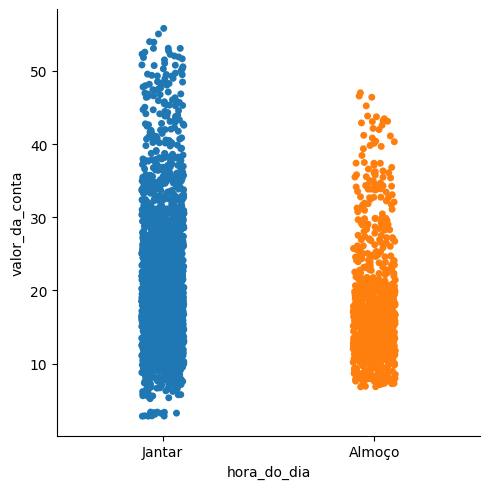

In [153]:
# Criar um de gráficos de categórias, relacionando o valor da conta com a hora do dia.
sns.catplot(x='hora_do_dia', y='valor_da_conta', hue='hora_do_dia', data=gorjetas)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 61.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 42.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


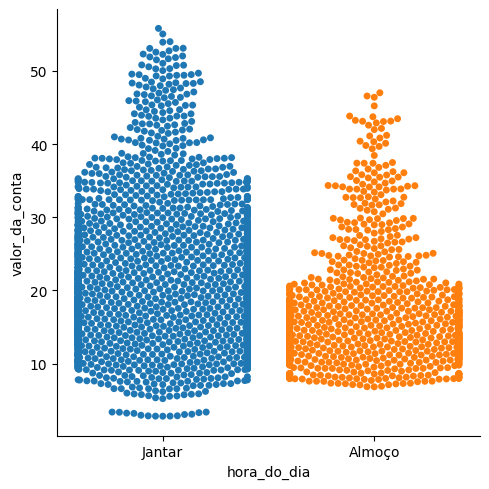

In [154]:
# Criar um de gráficos de categórias, relacionando o valor da conta com a hora do dia.
# O parâmetro kind='swarm', ajuda visualizar todos os pontos separadamente.
sns.catplot(x='hora_do_dia', y='valor_da_conta', hue='hora_do_dia', kind='swarm', data=gorjetas)

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

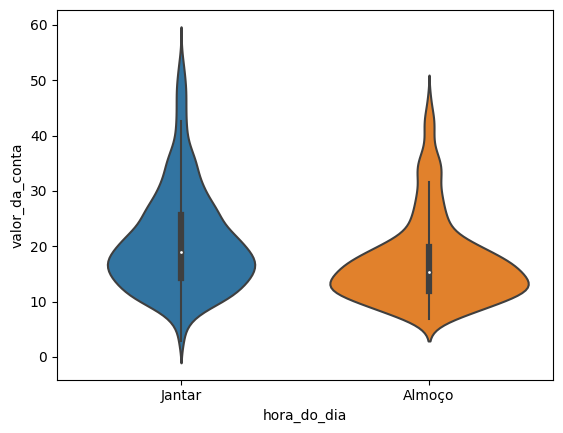

In [155]:
# Criar um de gráficos de violino, relacionando o valor da conta com a hora do dia.
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

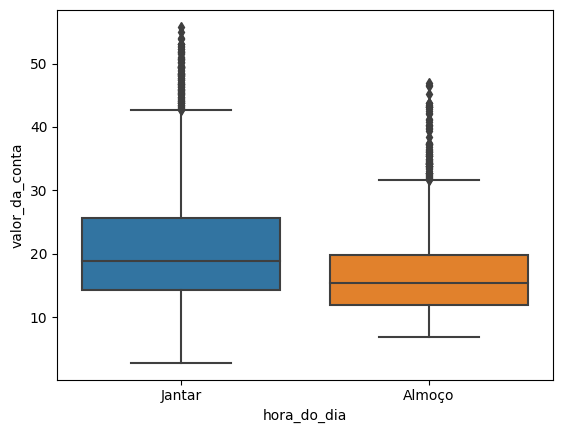

In [156]:
# Cria um gráfico box plot, com informações deposição, dispersão, assimetria, discrepâncias e etc.
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [157]:
# Faz um recorte do dataset, selecionando apenas os registros da hora do almoço.
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
almoco

77      27.200000
78      22.760000
79      17.290000
80      19.440000
81      16.660000
          ...    
3394     8.057385
3395    16.753736
3396    13.334323
3397    15.724707
3398    10.730000
Name: valor_da_conta, Length: 952, dtype: float64

<Axes: xlabel='valor_da_conta', ylabel='Count'>

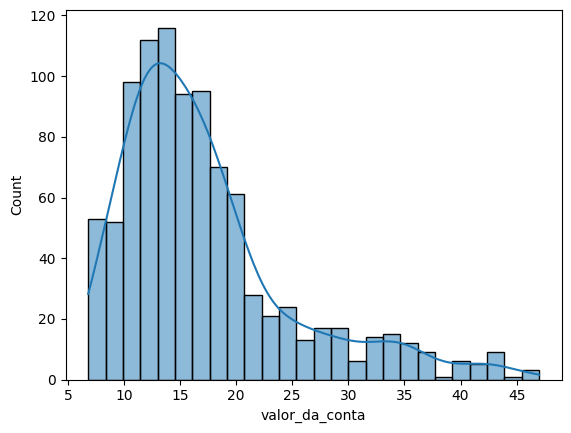

In [158]:
# Cria um gráfico de histograma, com a frequência do valor da conta na hora do almoço.
sns.histplot(almoco, kde= True)

In [159]:
# Faz um recorte do dataset, selecionando apenas os registros da hora do jantar.
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
jantar

0       16.990000
1       10.340000
2       21.010000
3       23.680000
4       24.590000
          ...    
3411    26.330845
3412    25.531567
3413    21.547132
3414    18.966233
3415    18.079740
Name: valor_da_conta, Length: 2464, dtype: float64

<Axes: xlabel='valor_da_conta', ylabel='Count'>

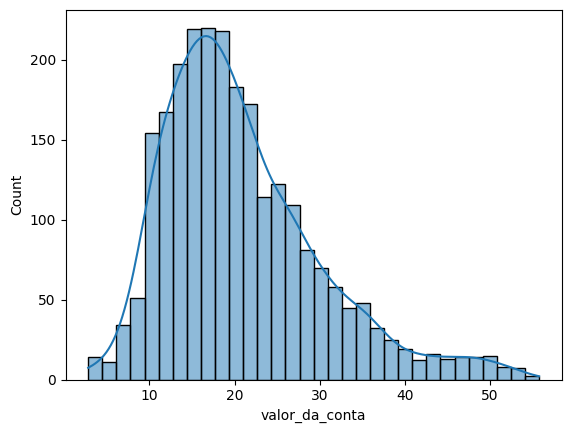

In [160]:
# Cria um gráfico de histograma, com a frequência do valor da conta na hora do jantar.
sns.histplot(jantar, kde= True)

In [161]:
# Calcula a média das variáveis/colunas, por dia da semana.
gorjetas.groupby(['hora_do_dia']).mean()

<ipython-input-161-b1079b182bcc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['hora_do_dia']).mean()


,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
hora_do_dia,,,,
Almoço,17.213913,2.534495,2.411765,0.157668
Jantar,20.832954,2.779458,2.630682,0.148876


In [162]:
# Calcula a média das variáveis/colunas, por hora do dia, mas especificando as colunas a ser consideradas.
# Exclui a média de pessoas, pois como não existem 2,41 pessoas, não faz sentido exibir esse tipo de dado.
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

<ipython-input-162-73968a4222ba>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


## Teste de hipótese 1

**H<sup>null</sup>** ou **H<sup>0</sup>**=
A distribuição do valor da conta é igual na hora do almoço e da janta.

**H<sup>alt</sup>** ou **H<sup>1</sup>**=
A distribuição do valor da conta não é igual na hora do almoço e da janta.

In [163]:
# Calcula a estatística de teste e p-valor, para verificar se os dois grupos são iguais ou diferentes.
r2 = ranksums(jantar, almoco)
# Formata uma frase para selecionar e exibir o apenas o p-valor.
print('O valor do p-value é de {}'.format(r2.pvalue))

O valor do p-value é de 5.169201062207143e-34


## Conclusão

...

## Teste de hipótese 2

**H<sup>null</sup>** ou **H<sup>0</sup>**=
A distribuição da taxa da gorjeta é igual na hora do almoço e da janta.

**H<sup>alt</sup>** ou **H<sup>1</sup>**=
A distribuição da taxa da gorjeta não é igual na hora do almoço e da janta.

In [164]:
# Faz um recorte do dataset, selecionando apenas o percentual dos registros da hora do almoço.
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_almoco

77      0.15
78      0.13
79      0.16
80      0.15
81      0.20
        ... 
3394    0.25
3395    0.19
3396    0.12
3397    0.15
3398    0.17
Name: porcentagem, Length: 952, dtype: float64

In [165]:
# Faz um recorte do dataset, selecionando apenas o percentual dos registros da hora do jantar.
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem
porcentagem_jantar

0       0.06
1       0.16
2       0.17
3       0.14
4       0.15
        ... 
3411    0.18
3412    0.06
3413    0.08
3414    0.09
3415    0.16
Name: porcentagem, Length: 2464, dtype: float64

In [166]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 1.3785725618355523e-11


## Conclusão

...